In [3]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import img_as_float
from skimage.util import random_noise
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Load image and convert to grayscale
f = cv.imread('/content/drive/My Drive/DIP-ESE558/Project3/input.jpeg')
# f = rgb2gray(f)
M,N,C = f.shape
f = cv.cvtColor(f,cv.COLOR_RGB2GRAY)

In [12]:
f = np.double(f)/255.0

f = random_noise(f, mode='s&p', amount=0.1)
# Introducing salt & pepper noise to the grayscale image

M = f.shape[0]
N = f.shape[1]

P = 2
Q = 2
total = (2*P +1) * (2*Q +1)
# Parameters for filter size

vec = []
g = np.zeros((M, N)) # Output Image

for m in range(M):
    for n in range(N):
        for p in range(-P, P+1):
            if m-p < 1:
                k = abs(m-p)+1
            elif m-p > M:
                k = M - ((m-p) - M)
            else:
                k = m-p
            for q in range(-Q, Q+1):
                if n-q < 1:
                    l = abs(n-q)+1
                elif n-q > N:
                    l = N - ((n-q) - N)
                else:
                    l = n-q
                vec.append(f[k-1, l-1])
        vec = sorted(vec)
        g[m,n] = vec[int(round(total/2))-1]
        vec = []


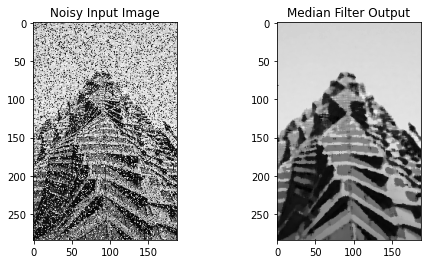

In [10]:
# Display input and output images
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(f, cmap=plt.cm.gray)
ax[0].set_title('Noisy Input Image')
ax[1].imshow(g, cmap=plt.cm.gray)
ax[1].set_title('Median Filter Output')
plt.show()